In [1]:
# Dashboard Analítico do Metrô de São Paulo
# e Companhia Paulista de Trens Metropolitanos (CPTM)
# ----------------------------------------
# Gera plots sobre capilaridade, modernização,
# prioridades estruturais, cadência e outros indicadores
# ----------------------------------------
# (Dataset do ano de 2019)

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Carrega dados
df = pd.read_csv("C:/Users/kelvi/my_projects/metro_cptm/train_stations.csv")

In [4]:
# Padroniza colunas
df["Linha"] = df["Linha"].astype(str).str.strip()
df["Nome"] = df["Nome"].astype(str).str.strip()
df["Inauguração_dt"] = pd.to_datetime(df["Inauguração"], errors="coerce")
df["Ano"] = df["Inauguração_dt"].dt.year

# Calcula idade se nao houver
if "Idade" not in df.columns or df["Idade"].isna().all():
    today = pd.Timestamp.today().normalize()
    df["Idade"] = (today - df["Inauguração_dt"]).dt.days // 365


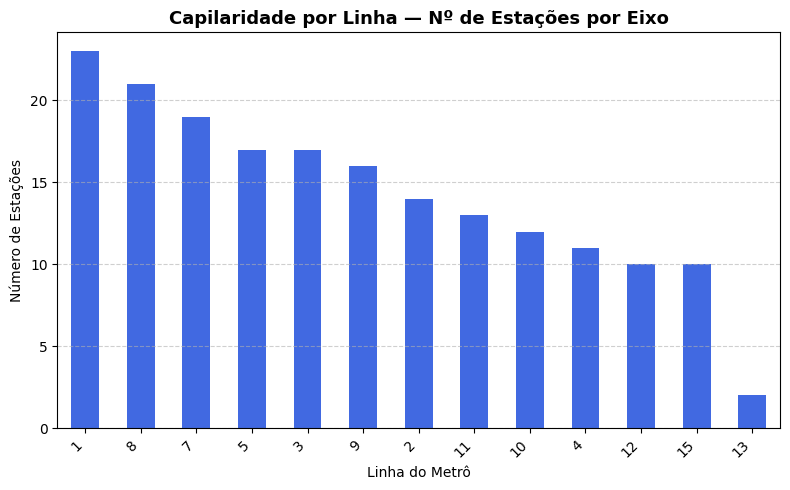

In [5]:
# ========= CAPILARIDADE =========
plt.figure(figsize=(8,5))
station_counts = df.groupby("Linha")["Nome"].nunique().sort_values(ascending=False)
station_counts.plot(kind="bar", color="royalblue")
plt.title("Capilaridade por Linha — Nº de Estações por Eixo", fontsize=13, weight="bold")
plt.ylabel("Número de Estações")
plt.xlabel("Linha do Metrô")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

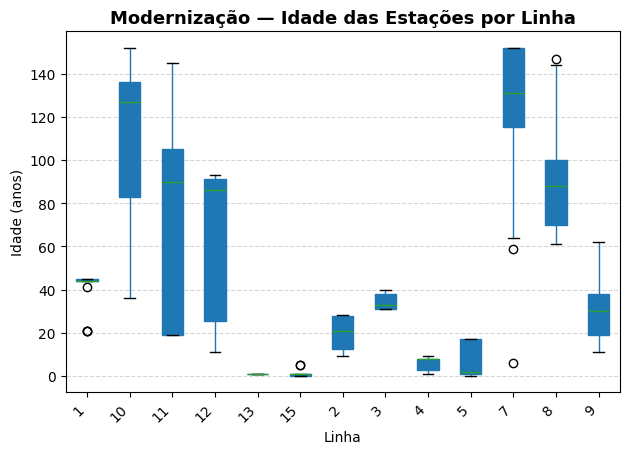

In [6]:
# ========= MODERNIZAÇÃO (IDADE) =========
plt.figure(figsize=(8,5))
df.boxplot(column="Idade", by="Linha", grid=False, patch_artist=True)
plt.title("Modernização — Idade das Estações por Linha", fontsize=13, weight="bold")
plt.suptitle("")  # remove título automático
plt.ylabel("Idade (anos)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

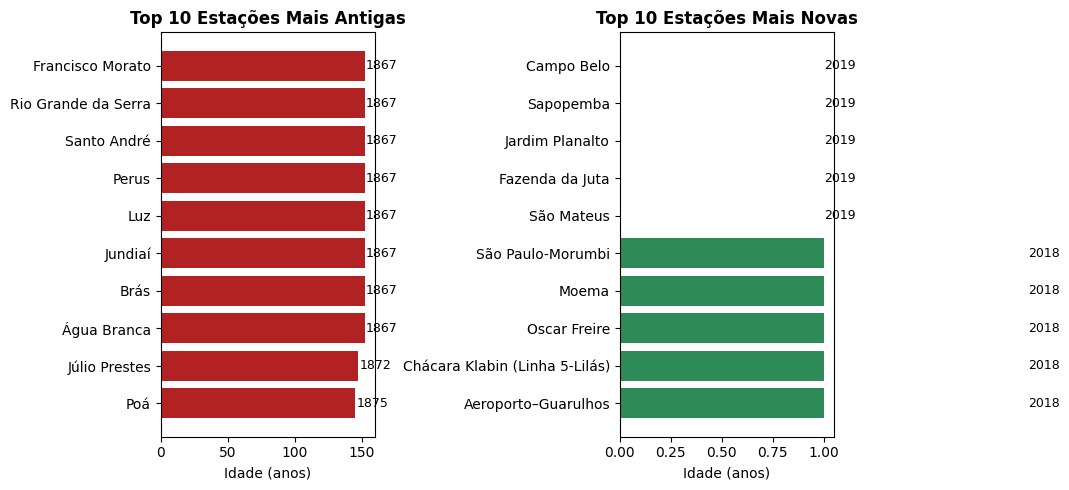

In [7]:
# ========= BENCHMARKS =========
fig, ax = plt.subplots(1, 2, figsize=(13,5))

# Top 10 estações mais antigas
top_old = df.sort_values("Idade", ascending=False).head(10)
ax[0].barh(top_old["Nome"], top_old["Idade"], color="firebrick")
ax[0].invert_yaxis()
ax[0].set_title("Top 10 Estações Mais Antigas", fontsize=12, weight="bold")
ax[0].set_xlabel("Idade (anos)")
for i, (idade, ano) in enumerate(zip(top_old["Idade"], top_old["Ano"])):
    ax[0].text(idade + 1, i, f"{int(ano)}", va="center", fontsize=9, color="black")

# Top 10 mais novas
top_new = df.sort_values("Idade", ascending=True).head(10)
ax[1].barh(top_new["Nome"], top_new["Idade"], color="seagreen")
ax[1].invert_yaxis()
ax[1].set_title("Top 10 Estações Mais Novas", fontsize=12, weight="bold")
ax[1].set_xlabel("Idade (anos)")
for i, (idade, ano) in enumerate(zip(top_new["Idade"], top_new["Ano"])):
    ax[1].text(idade + 1, i, f"{int(ano)}", va="center", fontsize=9, color="black")

plt.tight_layout()
plt.show()

C:\Users\kelvi\AppData\Local\Temp\ipykernel_33544\420095863.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cadencia_por_linha = df.groupby("Linha").apply(cadencia).dropna().sort_values()


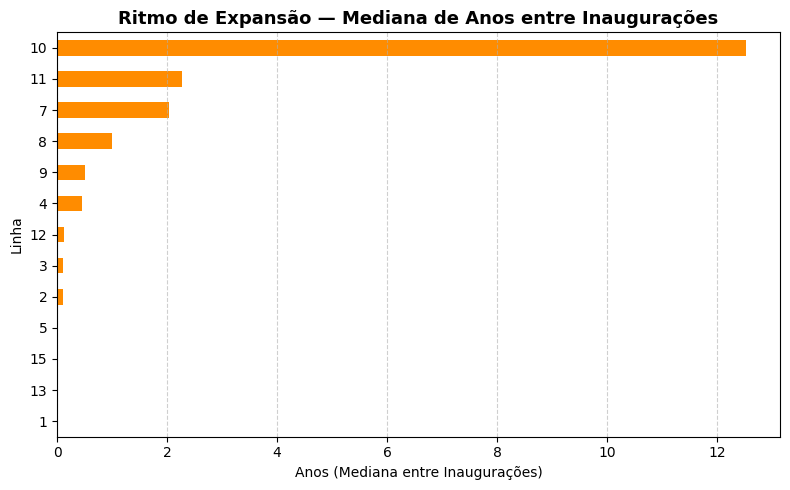

In [8]:
# ========= RITMO DE EXPANSÃO =========
def cadencia(grupo):
    grupo = grupo.dropna(subset=["Inauguração_dt"]).sort_values("Inauguração_dt")
    if len(grupo) < 2:
        return np.nan
    diffs = grupo["Inauguração_dt"].diff().dropna().dt.days / 365.25
    return diffs.median()

cadencia_por_linha = df.groupby("Linha").apply(cadencia).dropna().sort_values()

plt.figure(figsize=(8,5))
cadencia_por_linha.plot(kind="barh", color="darkorange")
plt.title("Ritmo de Expansão — Mediana de Anos entre Inaugurações", fontsize=13, weight="bold")
plt.xlabel("Anos (Mediana entre Inaugurações)")
plt.ylabel("Linha")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

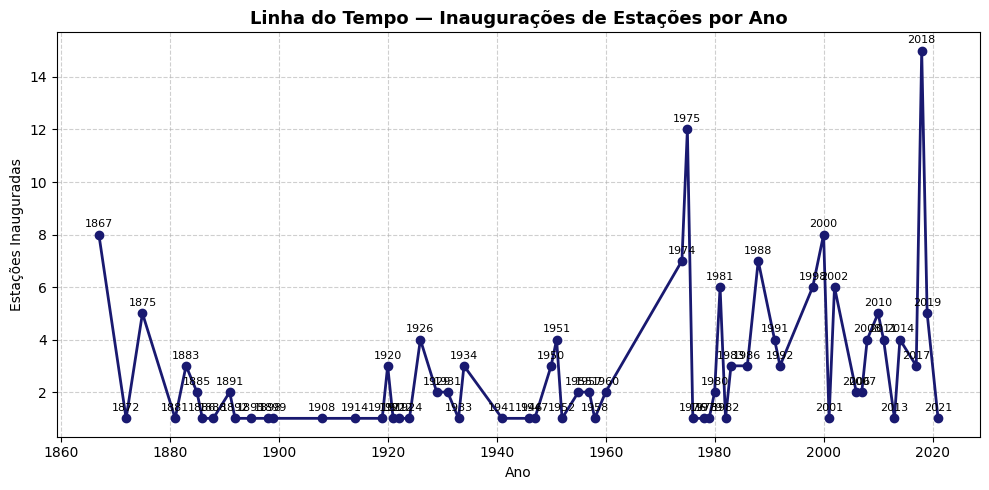

In [9]:
# ========= LINHA DO TEMPO DAS INAUGURAÇÕES =========
openings = df.dropna(subset=["Ano"]).groupby("Ano")["Nome"].count()

plt.figure(figsize=(10,5))
plt.plot(openings.index, openings.values, marker="o", color="midnightblue", linewidth=2)
plt.title("Linha do Tempo — Inaugurações de Estações por Ano", fontsize=13, weight="bold")
plt.xlabel("Ano")
plt.ylabel("Estações Inauguradas")
plt.grid(True, linestyle="--", alpha=0.6)
for x, y in zip(openings.index, openings.values):
    plt.text(x, y + 0.2, str(int(x)), ha="center", va="bottom", fontsize=8)
plt.tight_layout()
plt.show()

In [10]:
# ========= INDICADORES EXECUTIVOS =========
hoje = pd.Timestamp.today().normalize()
df["anos_desde_inaug"] = (hoje - df["Inauguração_dt"]).dt.days / 365

pct_antigas = (df["Idade"] > 40).mean() * 100
media_idade = df["Idade"].mean()
recent_5 = (df["Inauguração_dt"] > (hoje - pd.Timedelta(days=5*365))).sum()
recent_10 = (df["Inauguração_dt"] > (hoje - pd.Timedelta(days=10*365))).sum()

print("   - Indicadores Executivos de saúde da Rede Ferroviária\n")
print(f" -> Percentual de estações com idade > 40 anos: {pct_antigas:.1f}%")
print(f" -> Média de idade da rede: {media_idade:.1f} anos")
print(f" -> Estações inauguradas nos últimos 5 anos: {recent_5}")
print(f" -> Estações inauguradas nos últimos 10 anos: {recent_10}\n")

   - Indicadores Executivos de saúde da Rede Ferroviária

 -> Percentual de estações com idade > 40 anos: 47.6%
 -> Média de idade da rede: 52.1 anos
 -> Estações inauguradas nos últimos 5 anos: 1
 -> Estações inauguradas nos últimos 10 anos: 24

